In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import random

In [ ]:
def get_data(DATADIR):
    data = []
    for category in CATEGORIES:  # do fire and no fire

        path = os.path.join(DATADIR,category)  # create path to fire and no fire
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=fire 1=no fire

        for img in tqdm(os.listdir(path)):  # iterate over each image per fire and no fire
            try:
                img_array = cv2.imread(os.path.join(path,img))  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))
    return data

In [ ]:
def data_to_variables(data):
    
    random.shuffle(data)
    
    X = []
    y = []

    for features,label in data:
        X.append(features)
        y.append(label)
        
    X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
    y = np.array(y)
    
    return X, y

In [ ]:
IMG_SIZE = 64

In [ ]:
CATEGORIES = ["fire", "nofire"]

In [ ]:
DATADIR_1 = r"/content/drive/MyDrive/Fire/Fire/Dataset/Training and Validation"

data_1 = get_data(DATADIR_1)

100%|██████████| 760/760 [00:16<00:00, 45.84it/s] 


In [ ]:
print(len(data_1))

1520


In [ ]:
X_1,y_1 = data_to_variables(data_1)

In [ ]:
print(X_1.shape)

(1520, 64, 64, 3)


In [ ]:
print(y_1.shape)

(1520,)


In [ ]:
DATADIR_2 = r"/content/drive/MyDrive/Fire/Fire/Dataset/Testing"

data_2 = get_data(DATADIR_2)

100%|██████████| 190/190 [00:03<00:00, 50.87it/s] 


In [ ]:
print(len(data_2))

380


In [ ]:
X_2,y_2 = data_to_variables(data_2)

In [ ]:
print(X_2.shape)
print(y_2.shape)

(380, 64, 64, 3)
(380,)


In [ ]:
X = np.concatenate((X_1, X_2), axis=0)
print(X.shape)
y = np.concatenate((y_1, y_2,), axis=0)
print(y.shape)

(1900, 64, 64, 3)
(1900,)


In [ ]:
class_names = ['fire','no_fire']
#Função para mostrar a imagem pedida junto com a sua classificação
def ShowImagewithLabel(img):
    idx = y[img]
    print("Label of image {} is: {}".format(img, class_names[idx]))
    plt.imshow(X[img]);

Label of image 300 is: no_fire


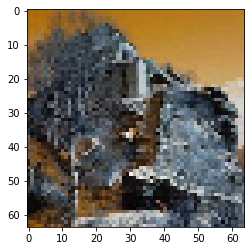

In [ ]:
ShowImagewithLabel(300)

Label of image 1300 is: no_fire


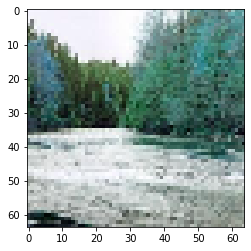

In [ ]:
ShowImagewithLabel(1300)

Label of image 1500 is: no_fire


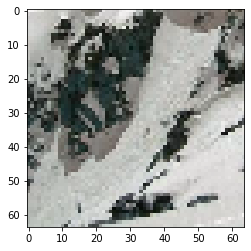

In [ ]:
ShowImagewithLabel(1500)

In [ ]:
print(X.min())
print(X.max())
print(X.mean())

0
255
93.0352456397341


In [ ]:
VALUE = X.max()
X = X/VALUE

In [ ]:
print(X.min())
print(X.max())
print(X.mean())

0.0
1.0
0.36484410054797706


In [ ]:
cont_fire = 0
cont_nfire = 0
for i in range(len(y)):
    if(y[i] == 0):
        cont_fire = cont_fire + 1
    else:
        cont_nfire = cont_nfire + 1
print(cont_fire)
print(cont_nfire)

950
950


In [ ]:
X_fire = []
X_nfire = []
for i in range(len(y)):
    if(y[i] == 0):
        X_fire.append(X[i])
    else:
        X_nfire.append(X[i])

In [ ]:
print(len(X_fire))
print(len(X_nfire))

950
950


In [ ]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

In [ ]:
X_fire = resample(X_fire,
                  replace=True,
                  n_samples=1250,
                  random_state=123)

In [ ]:
y_fire = np.zeros(len(X_fire))
y_nfire = np.ones(len(X_nfire))

In [ ]:
X = []
y = []
X = np.concatenate((X_fire, X_nfire), axis=0)
y = np.concatenate((y_fire, y_nfire), axis=0)
print(len(X))
print(len(y))

2200
2200


In [ ]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.25,
                                                    random_state=21)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1650, 64, 64, 3), (550, 64, 64, 3), (1650,), (550,))

In [ ]:
print (X_train.min(), X_train.max())
print (X_test.min(), X_test.max())

0.0 1.0
0.0 1.0


In [ ]:
LAYER_ACTIVATION = 'relu'
LAST_LAYER_ACTIVATION = 'sigmoid'
OUTPUT_LAYER_NEURONS = 1
LOSS = 'binary_crossentropy'
OPT = 'adam'

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
from tensorflow.keras import Sequential,utils
from tensorflow.keras.layers import Input, Flatten, Dense, Conv1D, MaxPooling1D, Dropout, Conv2D, MaxPool2D, AveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.models import load_model

In [ ]:
model = Sequential()

model.add(Conv2D(filters=16,kernel_size = (4,4),activation='relu',input_shape = (64,64,3)))
model.add(AveragePooling2D(pool_size=(2, 2),strides=(2, 2), padding='valid'))
model.add(Dropout(0.2))
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(AveragePooling2D(pool_size=(2, 2),strides=(2, 2), padding='valid'))
model.add(Dropout(0.2))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(AveragePooling2D(pool_size=(2, 2),strides=(2, 2), padding='valid'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 61, 61, 16)        784       
                                                                 
 average_pooling2d (AverageP  (None, 30, 30, 16)       0         
 ooling2D)                                                       
                                                                 
 dropout (Dropout)           (None, 30, 30, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        4640      
                                                                 
 average_pooling2d_1 (Averag  (None, 14, 14, 32)       0         
 ePooling2D)                                                     
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 32)        0

In [ ]:
model.compile(loss=LOSS,
              optimizer=OPT,
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=1)

In [ ]:
history = model.fit(X_train,
                    y_train,
                    epochs=10,
                    validation_split=0.2,
                    callbacks=[early_stop])

Epoch 1/10
42/42 [==============================] - 11s 22ms/step - loss: 0.3964 - accuracy: 0.8205 - val_loss: 0.2273 - val_accuracy: 0.9091
Epoch 2/10
42/42 [==============================] - 1s 12ms/step - loss: 0.1997 - accuracy: 0.9258 - val_loss: 0.3240 - val_accuracy: 0.8667


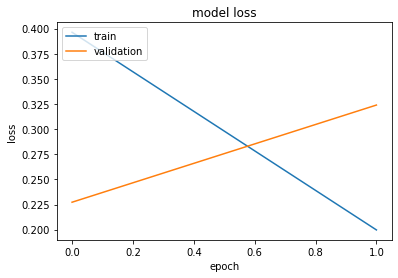

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

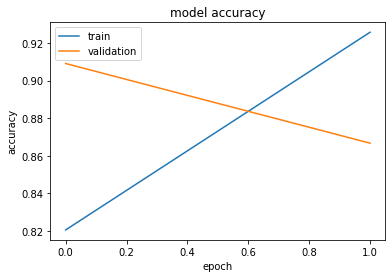

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
print(model.metrics_names)
print(model.evaluate(X_test,y_test,verbose=0))

['loss', 'accuracy']
[0.26877790689468384, 0.8672727346420288]


In [ ]:
predictions = model.predict(X_test)
for i in range(len(predictions)-1):
    if(predictions[i] > 0.5):
        predictions[i] = 1
    else:
        predictions[i] = 0
predictions.shape

(550, 1)

In [ ]:
print(y_test[3])
print(predictions[3])

1.0
[1.]


In [ ]:
int(predictions[2][0])

0

In [ ]:
y_test[2]

0.0

In [ ]:
def PredictionChoice(img):
    realClass = int(y_test[img])
    predictedClass = int(predictions[img][0])
    realClassName = class_names[realClass]
    predictedClassName = class_names[predictedClass]
    if(realClass == predictedClass):
        print("O modelo previu corretamente a classe: {}".format(realClassName))
    else:
        print("O modelo previu a classe {}, enquanto que na verdade a classe real da imagem era: {}".format(predictedClassName,realClassName))
    plt.imshow(X_test[img]);

In [ ]:
def test_vector_with_names(vector):
    lengthVector = len(vector)
    vector_with_names = vector
    for i in range(2):
        vector_with_names = np.where(vector==i, class_names[i], vector_with_names) 
    return vector_with_names

In [ ]:
#Função para substituir os elementos do vetor de predições de números inteiros para as suas classes correspondentes:
def predictions_with_names(predictions):
    lengthPredictions = len(predictions)
    predictedClassName = []
    for i in range(lengthPredictions):
        predictedClass = int(predictions[i][0])
        predictedClassName.append(class_names[predictedClass])
    return predictedClassName

O modelo previu corretamente a classe: fire


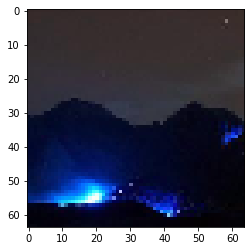

In [ ]:
PredictionChoice(16)

O modelo previu a classe fire, enquanto que na verdade a classe real da imagem era: no_fire


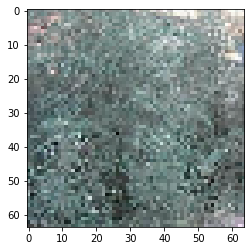

In [ ]:
PredictionChoice(316)

In [ ]:
y_test_with_names = test_vector_with_names(y_test)
predictionsClasses = predictions_with_names(predictions)
print(classification_report(y_test_with_names,predictionsClasses))

              precision    recall  f1-score   support

        fire       0.81      1.00      0.89       311
     no_fire       0.99      0.69      0.82       239

    accuracy                           0.87       550
   macro avg       0.90      0.85      0.86       550
weighted avg       0.89      0.87      0.86       550



In [ ]:
confusion_matrix(y_test_with_names,predictionsClasses)

array([[310,   1],
       [ 73, 166]])

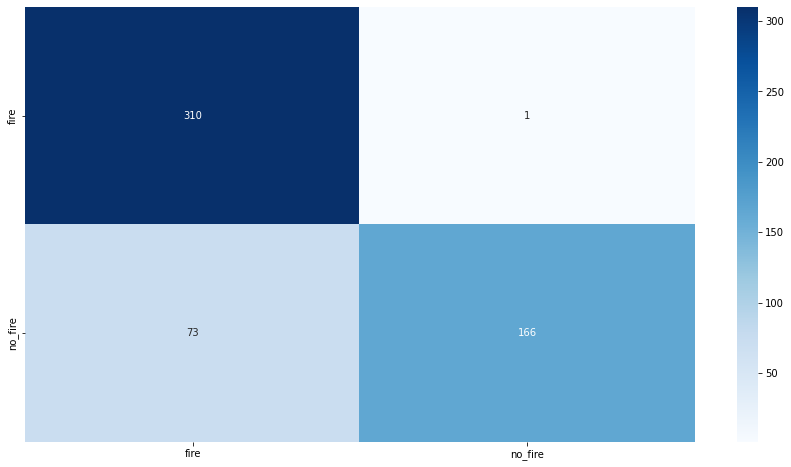

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.heatmap(confusion_matrix(y_test_with_names,predictionsClasses), cmap='Blues', annot=True, fmt='g', xticklabels = class_names, yticklabels = class_names);

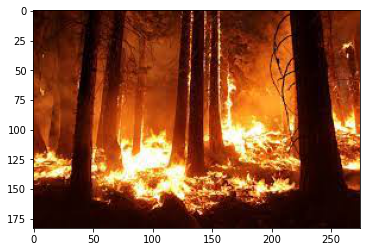

In [ ]:
plt.imshow(plt.imread('/content/drive/MyDrive/Fire/Fire/Dataset/fire1.jpg'))

In [ ]:
def ExImage(nomeImagem):
    new_img_array = cv2.imread('/content/drive/MyDrive/Fire/Fire/Dataset/{}'.format(nomeImagem))
    plt.imshow(new_img_array)
    new_img_array = cv2.resize(new_img_array, (64, 64))
    new_img_array = np.array(new_img_array).reshape(1,64,64,3)
    new_predictions = model.predict(new_img_array)
    if(new_predictions > 0.5):
        print("no fire")
    else:
        print("fire")  

fire


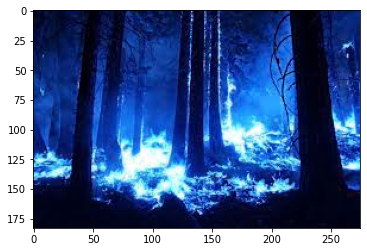

In [ ]:
ExImage('fire1.jpg')

no fire


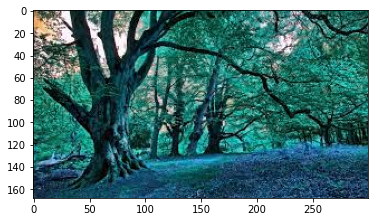

In [ ]:
ExImage('nofire2.jpg')

no fire


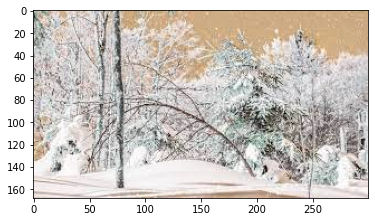

In [ ]:
ExImage('nofire3.jpg')

fire


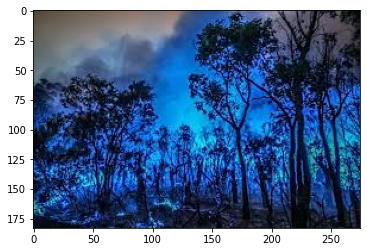

In [ ]:
ExImage('fire4.jpg')

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    featurewise_center=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)

In [ ]:
datagen.fit(X_train)

In [ ]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=32,
             subset='training'),
             validation_data=datagen.flow(X_train, y_train,
             batch_size=8, subset='validation'),
             epochs=20, callbacks=[early_stop])

Epoch 1/20
42/42 [==============================] - 3s 67ms/step - loss: 0.2193 - accuracy: 0.9152 - val_loss: 0.2088 - val_accuracy: 0.9394
Epoch 2/20
42/42 [==============================] - 3s 61ms/step - loss: 0.1908 - accuracy: 0.9311 - val_loss: 0.2049 - val_accuracy: 0.9333
Epoch 3/20
42/42 [==============================] - 3s 61ms/step - loss: 0.1672 - accuracy: 0.9364 - val_loss: 0.1665 - val_accuracy: 0.9576
Epoch 4/20
42/42 [==============================] - 3s 63ms/step - loss: 0.1642 - accuracy: 0.9432 - val_loss: 0.2037 - val_accuracy: 0.9273


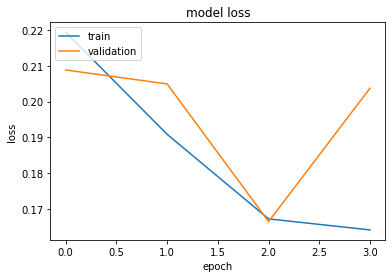

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

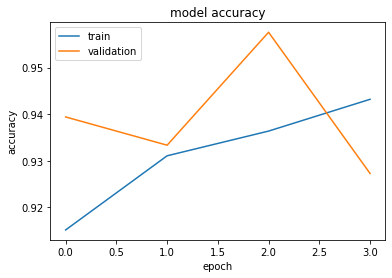

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
print(model.metrics_names)
print(model.evaluate(X_test,y_test,verbose=0))

['loss', 'accuracy']
[0.1635926514863968, 0.9509090781211853]


In [ ]:
predictions = model.predict(X_test)
for i in range(len(predictions)-1):
    if(predictions[i] > 0.5):
        predictions[i] = 1
    else:
        predictions[i] = 0
predictions.shape

(550, 1)

O modelo previu corretamente a classe: no_fire


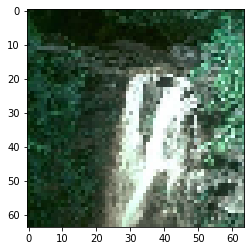

In [ ]:
PredictionChoice(198)

In [ ]:
y_test_with_names = test_vector_with_names(y_test)
predictionsClasses = predictions_with_names(predictions)
print(classification_report(y_test_with_names,predictionsClasses))

              precision    recall  f1-score   support

        fire       0.94      0.97      0.96       311
     no_fire       0.96      0.92      0.94       239

    accuracy                           0.95       550
   macro avg       0.95      0.95      0.95       550
weighted avg       0.95      0.95      0.95       550



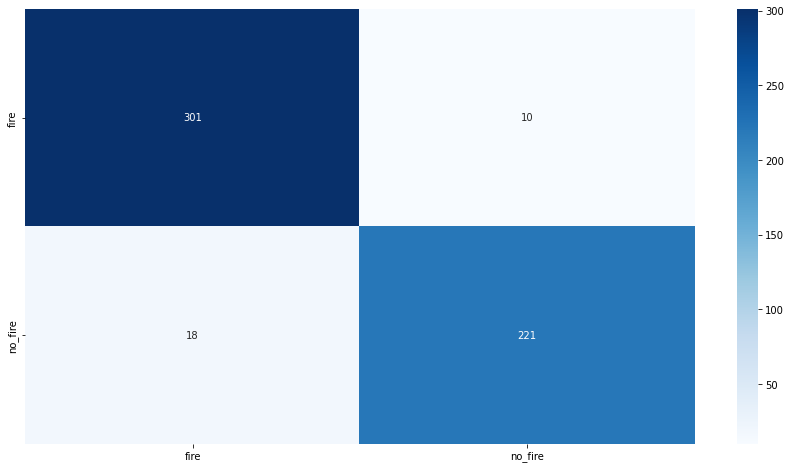

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(confusion_matrix(y_test_with_names,predictionsClasses), cmap='Blues', annot=True, fmt='g', xticklabels = class_names, yticklabels = class_names);

In [ ]:
print(model.metrics_names)
print(model.evaluate(X_test,y_test,verbose=0))

['loss', 'accuracy']
[0.1635926514863968, 0.9509090781211853]
